# Star Type Classification / NASA

NASA에서 수집한 별의 유형 분류 DataSet이다.

## Star Type Classification


For comparing all models of ML   
It can be used for prediction

Temperature -- K   
L -- L/Lo  
R -- R/Ro  
AM -- Mv  
Color -- General Color of Spectrum  
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types  
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants  

TARGET:  
Type

from 0 to 5  

Red Dwarf - 0  
Brown Dwarf - 1  
White Dwarf - 2  
Main Sequence - 3  
Super Giants - 4  
Hyper Giants - 5

MATH:  

Lo = 3.828 x 10^26 Watts  
(Avg Luminosity of Sun)  
Ro = 6.9551 x 10^8 m  
(Avg Radius of Sun)  

## 요약
 요약
Calumns: 온도(K), 광도(L), 반지름(R), AM, 색상, 스펙트럼(Spectral Class), Type (분류)  

![Spectral_Class](https://scienceruls.weebly.com/uploads/5/1/7/4/51741831/846626525.GIF?448)

참고는 Kaggle에서   
https://www.kaggle.com/sohelranaccselab/star-type-classification-using-machine-learning  
https://www.kaggle.com/harshgupta57/star-type-eda-classifications

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [88]:
DATA_PATH = os.path.join('data') # 데이터 저장 폴더

def load_star_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'Stars.csv')
    return pd.read_csv(csv_path)

In [89]:
star = load_star_data()
star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [90]:
# Stars DataSet은 String 형식의 Data가 존재해서 데이터 스케일링이 불가능하다. 즉 convert numeric to categorical을 해줘야 한다.
# Data를 Numeric하게 바꾸는 작업이 필요한 column은 Color와 Spectral_Class이다.
star.info()
star.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,count,mean,std,min,25%,50%,75%,max
Temperature,240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
L,240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
R,240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
A_M,240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [91]:
# 데이터를 보면 같은 데이터인데 구분을 이상하게 한 모습을 볼수 있다. 이것을 7개 정도로 추려보자.
star.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
Orange-Red              1
White-Yellow            1
Blue-White              1
Pale yellow orange      1
Yellowish               1
Name: Color, dtype: int64

In [92]:
color_dict = {
    'Red' : 'Red', 
    'Blue' : 'Blue', 
    'Blue-white' : 'Blue-white', 
    'Blue White' : 'Blue-white', 
    'yellow-white' : 'White-Yellow', 
    'White' : 'White',
    'Blue white' : 'Blue-white', 
    'white' : 'White', 
    'Yellowish White' : 'White-Yellow', 
    'yellowish' : 'Yellow', 
    'Orange' : 'Orange',
    'Whitish' : 'White', 
    'Yellowish' : 'Yellow', 
    'Blue-White' : 'Blue-white', 
    'Pale yellow orange' : 'Orange',
    'Orange-Red' : 'Orange', 
    'White-Yellow' : 'White-Yellow' 
}

star.Color = star.Color.map(color_dict).astype('category')
star.Color.value_counts()
star.groupby('Color').describe()
# 이제 Color의 종류를 7가지로 분류 했다.

Temperature                                               \
                   count          mean          std     min       25%   
Color                                                                   
Blue                56.0  21918.339286  9453.979609  5752.0  14797.75   
Blue-white          41.0  16659.951220  6560.050964  8570.0  11900.00   
Orange               4.0   5094.500000  1530.042810  3749.0   4152.50   
Red                112.0   3291.785714   490.780761  1939.0   2987.50   
White               12.0   9579.583333  2368.265513  7220.0   7974.00   
White-Yellow        12.0   7609.166667  2428.134444  5300.0   5902.00   
Yellow               3.0   4527.666667   451.502307  4077.0   4301.50   

                                              L                 ...      A_M  \
                  50%       75%      max  count           mean  ...      75%   
Color                                                           ...            
Blue          19921.5  27489.50  40000.0   56.0  249974.732446  ...  -4.3900   
Blue-white    14100.0  22012.00  30000.0   41.0   68904.416521  ...  11.3800   
Orange         4699.5   5641.50   7230.0    4.0  295000.157520  ...   7.0300   
Red            3324.0   3550.75   6850.0  112.0   60526.787893  ...  16.8900   
White          8879.5   9918.50  14732.0   12.0   78542.975191  ...  14.0725   
White-Yellow   6928.5   7852.50  12990.0   12.0       1.960553  ...  12.3200   
Yellow         4526.0   4753.00   4980.0    3.0       0.198333  ...   6.3670   

                       Type                                                
                 max  count      mean       std  min   25%  50%  75%  max  
Color                                                                      
Blue          12.900   56.0  3.571429  0.988243  2.0  3.00  4.0  4.0  5.0  
Blue-white    14.870   41.0  2.951220  0.973427  2.0  2.00  3.0  3.0  5.0  
Orange        14.080    4.0  3.750000  1.500000  2.0  2.75  4.0  5.0  5.0  
Red           20.060  112.0  1.705357  1.975701  0.0  0.00  1.0  4.0  5.0  
White         14.810   12.0  2.666667  1.154701  2.0  2.00  2.0  3.0  5.0  
White-Yellow  14.470   12.0  2.666667  0.492366  2.0  2.00  3.0  3.0  3.0  
Yellow         6.506    3.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0  

[7 rows x 40 columns]

In [93]:
star.Spectral_Class.value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [94]:
from sklearn import preprocessing
# 사이킷 런의 preprocessing중 LabelEncoder이라는 것이 있다. 이를 적용해서 Object 형식의 값들을 Int 형식으로 형변환 해보겠다.

le = preprocessing.LabelEncoder()

selected_columns = ['Color','Spectral_Class']

le.fit(star[selected_columns].values.flatten())
star[selected_columns] = star[selected_columns].apply(le.fit_transform)
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    int32  
 5   Spectral_Class  240 non-null    int32  
 6   Type            240 non-null    int64  
dtypes: float64(3), int32(2), int64(2)
memory usage: 11.4 KB


In [95]:
star
# 이렇게 다듬어진 DataSet을 Normalize 시켜보자.

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,3,5,0
1,3042,0.000500,0.1542,16.60,3,5,0
2,2600,0.000300,0.1020,18.70,3,5,0
3,2800,0.000200,0.1600,16.65,3,5,0
4,1939,0.000138,0.1030,20.06,3,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,4,0,5
238,9235,404940.000000,1112.0000,-11.23,4,0,5


In [96]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
trans_star = norm.fit_transform(star)
pd.DataFrame(trans_star,columns=star.columns)

#Normalizer를 써봤는데 Color와 같이 값이 같은 것들에 대해서 같은 값을 보이지 않는다. 다른 스케일링 기법을 사용해 봐야겠다.

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.999984,7.822564e-07,0.000055,0.005254,0.000978,0.001630,0.000000
1,0.999983,1.643628e-07,0.000051,0.005457,0.000986,0.001644,0.000000
2,0.999972,1.153813e-07,0.000039,0.007192,0.001154,0.001923,0.000000
3,0.999980,7.142715e-08,0.000057,0.005946,0.001071,0.001786,0.000000
4,0.999942,7.116658e-08,0.000053,0.010345,0.001547,0.002578,0.000000
...,...,...,...,...,...,...,...
235,0.103330,9.946406e-01,0.003598,-0.000026,0.000000,0.000016,0.000013
236,0.036950,9.993161e-01,0.001431,-0.000013,0.000000,0.000007,0.000006
237,0.016424,9.998616e-01,0.002647,-0.000020,0.000007,0.000000,0.000009
238,0.022800,9.997363e-01,0.002745,-0.000028,0.000010,0.000000,0.000012


In [97]:
from sklearn.preprocessing import StandardScaler

stand=StandardScaler()
trans_star = stand.fit_transform(star)
data_scaled=pd.DataFrame(trans_star,columns=star.columns)
# StandardScaler를 사용하니 같은 값을 가진 값들이 같은 값을 가지게 되었다.

In [98]:
from sklearn.decomposition import PCA

#PCA 차원 축소 기법을 먼저 적용해 보자
pca = PCA(n_components=2)
star_pca = pca.fit_transform(data_scaled)
star_pca = pd.DataFrame(star_pca, columns=['x','y'])
star_pca

,x,y
0,-2.094783,0.417379
1,-2.118222,0.413443
2,-2.231884,0.415416
3,-2.128770,0.427022
4,-2.318172,0.438620
...,...,...
235,4.230729,-0.489220
236,5.012903,0.220416
237,2.819381,1.598315
238,2.316648,1.224112


군집 개수를 결정하기 위한 방법으로 3가지를 써볼 것이다.
 개수를 결정하기 위한 방법으로 3가지를 써볼 것이다.
지금까지 해왔던 것을 토대로 해보자면

    1. Hierarchical Clustering
    2. The Elbow Method
    3. The Sillhouette Method

![img](https://t1.daumcdn.net/cfile/tistory/993C14505FDE1C6602)   
출처: https://rfriend.tistory.com/585

이 세가지로 군집의 개수를 결정해 보겠다.

## 1. Hierarchical Clustering

HCA의 경우 숫자가 클수록 계산량이 크게 증가하는 경향이 있음 

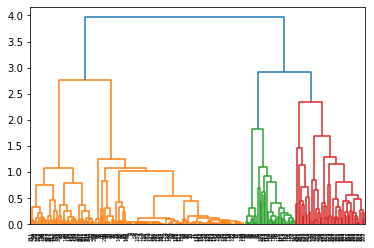

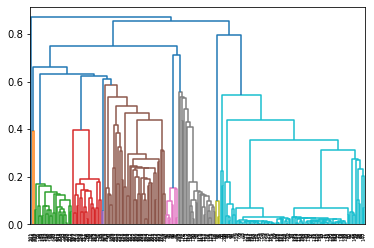

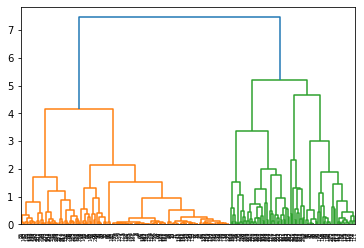

In [99]:
import scipy.cluster.hierarchy as shc

demd = shc.dendrogram(shc.linkage(star_pca, method='average'))
plt.show()
demd = shc.dendrogram(shc.linkage(star_pca, method='single'))
plt.show()
demd = shc.dendrogram(shc.linkage(star_pca, method='complete'))
plt.show()

cluster의 갯수가 정확히 몇개인지 확인이 어렵고 시간이 꽤 오래걸렸다. cluster의 수는 4~6개 정도가 적당할 것으로 추정된다.

## 2. The elbow method (K-means Algorithm)

    K-means 알고리즘의 클러스터 갯수를 파악하기 위해 elbow method를 사용해보자.

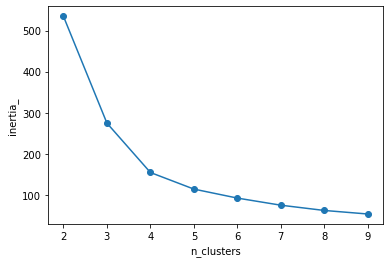

[534.4322960692987,
 274.8255208637073,
 154.83673723071993,
 114.46634426389627,
 92.60569354067927,
 75.31633114336098,
 62.537853697781046,
 53.91014365853319]

In [100]:
from sklearn.cluster import KMeans

arr = []
k_range = range(2,10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(star_pca)
    arr.append(km.inertia_)

# 일단 plot 해보는데 정확하게 나타내기위한 방법을 생각해본다.
plt.plot(range(2,10), arr, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('inertia_')
plt.show()

arr

In [101]:
# 기울기가 가장 크게 변화한 구간을 찾는 것이므로 기울기와 기울기의 변화량을 구해보자
m=[]

for i in range(1,7):
    pre=arr[i]-arr[i-1]
    nex=arr[i+1]-arr[i]
    m.append(pre/nex)

# 그냥 기울기의 변화량으로만 계산해 보면 가장 큰 값이 있는 3의 구간이 나타날것이 뻔해서 비율로 나타내 보았음, cluster = 4가 적당해 보인다.
m

[2.163592023731626,
 2.9721975639819513,
 1.8467150625094826,
 1.2643988957399472,
 1.3530064493950067,
 1.4810972306034906]

In [102]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(star_pca)
predict = pd.DataFrame(km.predict(star_pca),columns=['predict'])
predict = pd.concat([star_pca,predict],axis=1)
predict.groupby('predict').describe()
# 값이 비슷하게 나오는것은 x에서는 1,2이고 y는 딱히 클러스터끼리 붙어있는 곳은 없는것 같다.
# 1,2 또한 y 좌표에서는 확실히 구분이 되게 분포되어있다.

x                                                              \
         count      mean       std       min       25%       50%       75%   
predict                                                                      
0        107.0 -1.720104  0.426634 -2.318172 -2.129170 -1.681212 -1.538006   
1         36.0  1.942890  0.384809  1.230130  1.687965  1.911777  2.095625   
2         36.0  1.798538  0.739817  0.483367  1.279359  1.939986  2.243369   
3         47.0 -0.101207  0.540067 -0.965849 -0.552658 -0.201711  0.263831   
4         14.0  3.865461  0.752150  2.784264  3.352262  3.947800  4.220315   

                       y                                                    \
              max  count      mean       std       min       25%       50%   
predict                                                                      
0       -0.449818  107.0  0.408978  0.314698 -0.634575  0.391975  0.430152   
1        2.917156   36.0 -0.786487  0.760609 -2.524991 -1.140524 -0.614970   
2        3.203962   36.0  1.910799  0.532663  1.039919  1.217526  2.152204   
3        1.025278   47.0 -1.750413  0.349450 -2.468549 -2.098537 -1.622243   
4        5.135596   14.0 -0.140466  0.538376 -1.403510 -0.444587 -0.186718   

                             
              75%       max  
predict                      
0        0.514173  1.490080  
1       -0.242812  0.249406  
2        2.328844  2.666942  
3       -1.476200 -1.265082  
4        0.266030  0.638797

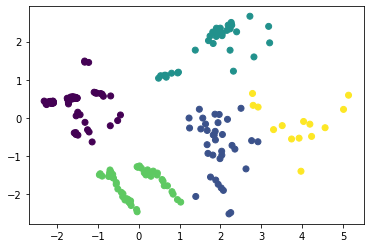

In [103]:
# plot: 제대로 묶인건지는 모르겠으나 겉보기에는 괜찮게 잘 묶인것으로 보인다. (한번 5개, 6개로도 해보는것도 좋을듯?)

plt.scatter(predict.x, predict.y, c=predict.predict)
# 직접 해봤을 때 결과적으로 눈에 보이는 것은 5개가 좀더 낫다는 느낌이 든다.

다만 초록색으로 묶인 부분 같은 경우는 DBSCN으로 묶을 때 더 잘 묶일 것 같다는 생각이 든다. 이번에는 실루엣 메소드를 사용해서 클러스터의 개수를 정해봐야겠다.

## 3. The Sillhouette Method (일단 보류..)

## DBSCAN

다음은 DBSCAN을 이용한 분석이다. 

             x                                                              \
         count      mean       std       min       25%       50%       75%   
predict                                                                      
-1        10.0  2.071990  2.528107 -1.327447 -0.369559  2.535151  3.779148   
 0       104.0 -1.732402  0.426391 -2.318172 -2.129619 -1.686120 -1.544599   
 1        27.0 -0.488221  0.264923 -0.965849 -0.694477 -0.513487 -0.257192   
 2        36.0  2.016560  0.444669  1.230130  1.739552  1.941347  2.199003   
 3        21.0  0.467606  0.386695 -0.042289  0.173181  0.446563  0.700613   
 4         9.0  0.705948  0.169759  0.483367  0.631301  0.660541  0.801745   
 5        25.0  2.094819  0.351798  1.382440  1.898142  2.039153  2.262191   
 6         8.0  3.936502  0.409971  3.299156  3.682890  3.979862  4.199487   

                       y                                                    \
              max  count      mean       std       min       25

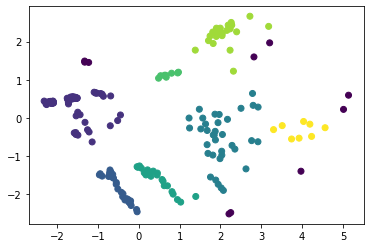

In [105]:
from sklearn.cluster import DBSCAN # DBSCAN clustering
# create model and prediction
model = DBSCAN(eps=0.6,min_samples=5) # 주변 밀집도 5으로 설정 (ln(240))
predict = pd.DataFrame(model.fit_predict(star_pca))
predict.columns=['predict']

# concatenate labels to df as a new column
star_DBSCAN = pd.concat([star_pca,predict],axis=1)
print(star_DBSCAN.groupby('predict').describe())

plt.scatter(star_DBSCAN.x,star_DBSCAN.y,c=star_DBSCAN['predict'])
plt.show()
# 대락 0.6~0.7사이에서 노이즈가 최소화된 값들이 나오는 것 같다.

## T-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.001s...
[t-SNE] Computed neighbors for 240 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.224997
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.850285
[t-SNE] KL divergence after 1000 iterations: 0.115425


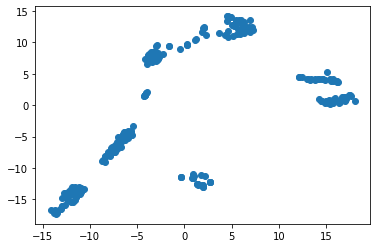

In [106]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, verbose=1, random_state=0)
transformed = model.fit_transform(data_scaled.iloc[:,:6])
star_TSNE = pd.DataFrame(transformed, columns=['x','y'])
plt.scatter(star_TSNE.x,star_TSNE.y)
# 값이 나오기는 하는데 확실하게 분류하기는 힘들어 보인다

In [107]:
# 스케일링 기법을 다른것으로 바꿔보았다. 아웃라이어의 영향을 가장 적게 받는다는 스케일링 기법인 robustscaler를 써봤다.
from sklearn.preprocessing import RobustScaler
robus = RobustScaler()
robus.fit(star)
data_scaled = robus.transform(star)
data_scaled = pd.DataFrame(data_scaled,columns=star.columns)
data_scaled

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,-0.231231,-3.438526e-07,-0.013893,0.391721,0.0,0.00,-0.833333
1,-0.233451,-3.534461e-07,-0.014264,0.415805,0.0,0.00,-0.833333
2,-0.271192,-3.544559e-07,-0.015488,0.521174,0.0,0.00,-0.833333
3,-0.254115,-3.549609e-07,-0.014128,0.418314,0.0,0.00,-0.833333
4,-0.327634,-3.552739e-07,-0.015464,0.589413,0.0,0.00,-0.833333
...,...,...,...,...,...,...,...
235,2.831807,1.892603e+00,31.777840,-0.915354,-1.5,0.25,0.833333
236,2.140079,4.211270e+00,27.979237,-0.950477,-1.5,0.25,0.833333
237,0.260690,2.713925e+00,33.348868,-0.955494,0.5,-1.25,0.833333
238,0.295357,2.044635e+00,26.056487,-0.980582,0.5,-1.25,0.833333


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.124317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.416103
[t-SNE] KL divergence after 1000 iterations: 0.086336


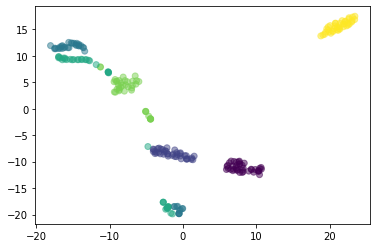

In [108]:
# 이거로 다시 해보자 이번에는 실제 데이터의 타입으로 색을 표시해 봤다.

model = TSNE(n_components=2, verbose=1, random_state=0)
transformed = model.fit_transform(data_scaled.iloc[:,:6])
star_TSNE = pd.DataFrame(transformed, columns=['x','y'])
plt.scatter(star_TSNE.x,star_TSNE.y,c=star.Type,alpha=0.5)

#이것도 확실하게 스케일링 되지는 않는것 같다.. 다만 스케일링 했을 경우 확실히 전보다는 나은 모습을 보인다.